In [45]:
import astropy.io.fits as pf
import pylab as mplot
%pylab inline
import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord
from pylab import cm

Populating the interactive namespace from numpy and matplotlib


In [2]:
planck = pf.open('HFI_PCCS_SZ-union_R2.08.fits')
planck_data = pf.open('HFI_PCCS_SZ-union_R2.08.fits')[1].data
print(planck[1].header.keys)

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  359 / length of dimension 1                          
NAXIS2  =                 1653 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   30 / number of table fields                         
EXTNAME = 'PSZ2_UNION'                                                          
TTYPE1  = 'INDEX   '                                                            
TFORM1  = 'I       '                                                            
TUNIT1  = 'None    '                                                            

In [3]:
print(len(planck_data))

1653


(array([242., 243., 239., 186.,  85.,  54.,  30.,   9.,   4.,   2.]),
 array([0.011054 , 0.1071486, 0.2032432, 0.2993378, 0.3954324, 0.491527 ,
        0.5876216, 0.6837162, 0.7798108, 0.8759054, 0.972    ]),
 <a list of 10 Patch objects>)

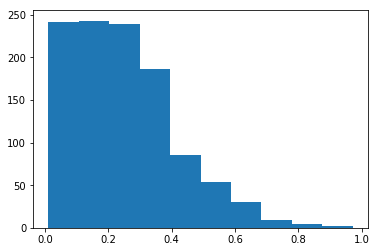

In [4]:
z = planck_data['redshift']
mplot.hist(z[z>0])

(array([872., 149.,  44.,  12.,   6.,   4.,   2.,   3.,   1.,   1.]),
 array([ 4.50093508,  8.94935269, 13.39777031, 17.84618793, 22.29460554,
        26.74302316, 31.19144077, 35.63985839, 40.088276  , 44.53669362,
        48.98511124]),
 <a list of 10 Patch objects>)

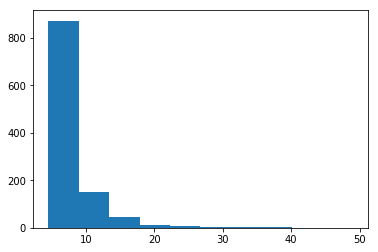

In [50]:
mass = planck_data['snr']
mplot.hist(mass[z>0])

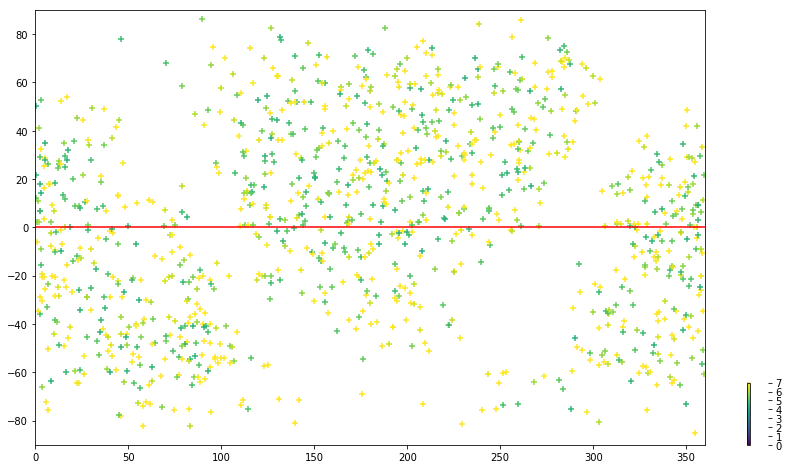

In [51]:
mplot.figure(figsize=(15,8))
ra = planck_data['ra']
dec = planck_data['dec']
mplot.scatter(ra[z>0], dec[z>0], marker='+', c=mass[z>0])
mplot.plot([0,360],[0,0], color='r')
mplot.xlim(0,360)
mplot.ylim(-90,90)
mplot.colorbar()
mplot.clim(0,7)

In [52]:
# find 10 most massive cluster
N = 10
id_massive = np.argsort(mass[z>0])[-1*N:][::-1]
mass_massive = mass[z>0][id_massive]
RA_massive, DEC_massive = ra[z>0][id_massive], dec[z>0][id_massive]
Z_massive = z[z>0][id_massive]

In [53]:
sz_map = hp.read_map('COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits', nest=False)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


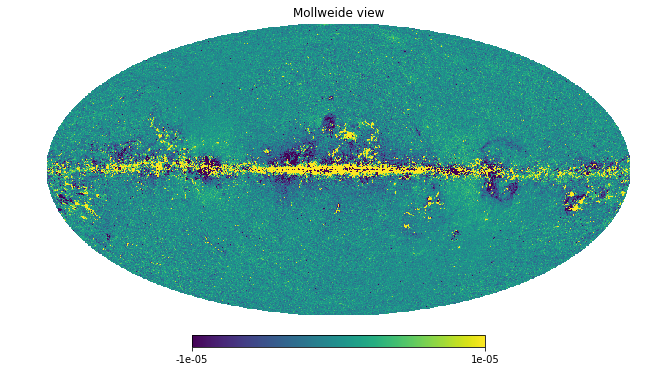

In [54]:
hp.mollview(sz_map, min=-0.00001, max=0.00001)

In [55]:
c = SkyCoord(ra=RA_massive*u.degree, dec=DEC_massive*u.degree, frame='icrs')
theta_p = (90.- np.array(c.galactic.b))/180*np.pi
phi_p = np.array(c.galactic.l)/180*np.pi

In [56]:
nside = 2048
pix_p = hp.ang2pix(nside, theta_p, phi_p, nest=False)
pix = np.arange(hp.nside2npix(nside))
theta, phi = hp.pix2ang(nside, pix)

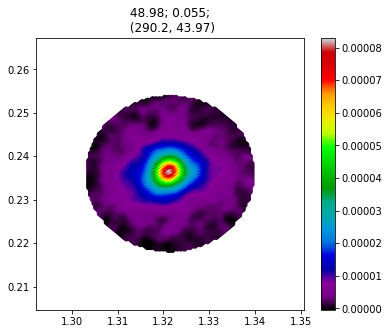

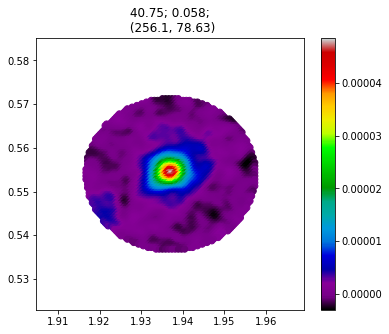

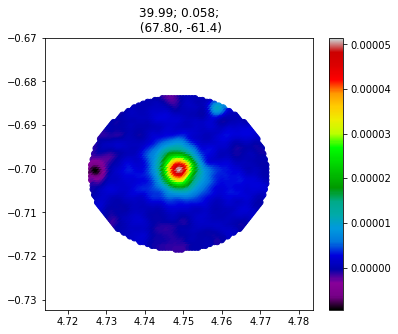

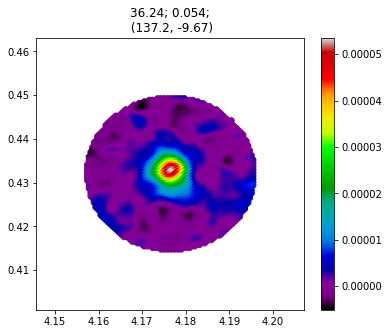

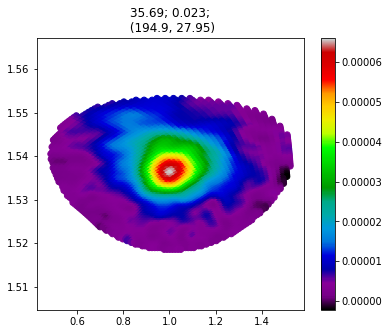

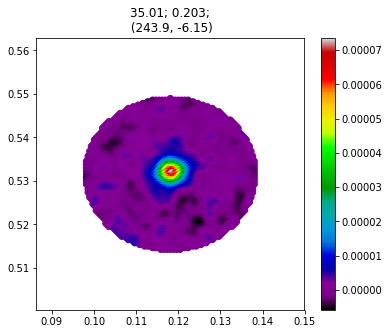

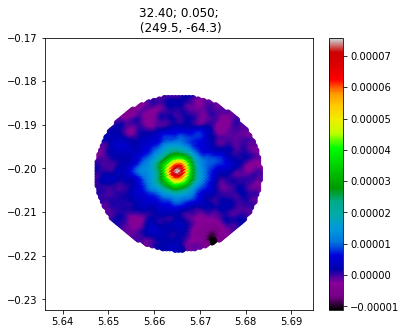

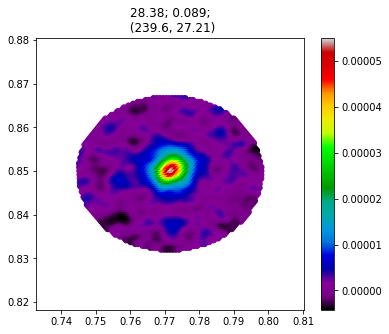

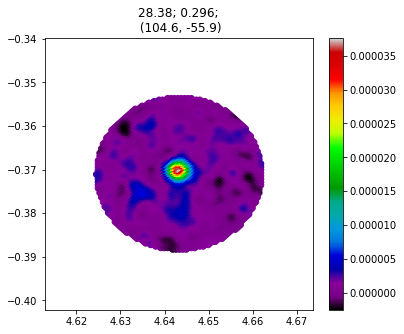

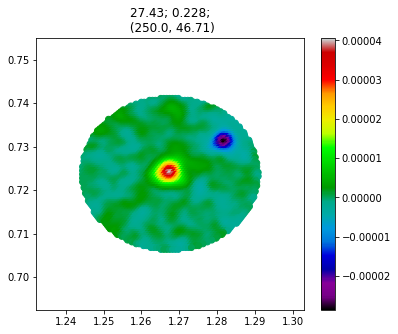

In [59]:
for i in range(N):
    c1 = SkyCoord(phi_p[i]*u.rad, (np.pi/2 - theta_p[i])*u.rad, frame='icrs')
    c2 = SkyCoord(phi*u.rad, (np.pi/2 - theta)*u.rad, frame='icrs')
    sep = c1.separation(c2)
    ids = (sep.degree<1)
    
    mplot.figure(figsize=(6,5))
    mplot.scatter(phi[ids]*u.rad, (np.pi/2 - theta[ids])*u.rad, c=sz_map[ids], cmap='nipy_spectral')
    mplot.colorbar()
    mplot.title(str(mass_massive[i])[:5]+'; '+str(Z_massive[i])[:5]+';\n ('+str(RA_massive[i])[:5]+', '+str(DEC_massive[i])[:5]+')')
    mplot.show()

In [22]:
bin_edge = np.logspace(np.log10(0.5), np.log10(60.0), num=21)
bin_min = bin_edge[:-1]
bin_max = bin_edge[1:]


In [153]:
new_ra = phi[ids]*u.rad
new_dec = (np.pi/2 - theta[ids])*u.rad
new_sz = sz_map[ids]
Y = []
Yerr = []
for i in range(20):
    c2 = SkyCoord(new_ra, new_dec, frame='icrs')
    sep = c1.separation(c2)
    mask = (np.array(sep.degree) >= bin_min[i]/60)*(np.array(sep.degree) < bin_max[i]/60)
    Y.append(np.mean(new_sz[mask]))
    Yerr.append(np.std(new_sz[mask]))
        

/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [58]:
## Find the cluster in the paper (Lon, Lat) = (75.7, 13.52)
lon = planck_data['GLON']
lat = planck_data['GLAT']
mask = (lon>75.6)*(lon<75.8)*(lat>13.5)*(lat<13.6)
print(planck_data['MSZ'][mask])
print(planck_data['SNR'][mask])

[8.735104]
[48.98511]


In [39]:
c = SkyCoord(ra=planck_data['RA'][mask]*u.degree, dec=planck_data['DEC'][mask]*u.degree, frame='icrs')
theta_p = (90.- np.array(c.galactic.b))/180*np.pi
phi_p = np.array(c.galactic.l)/180*np.pi

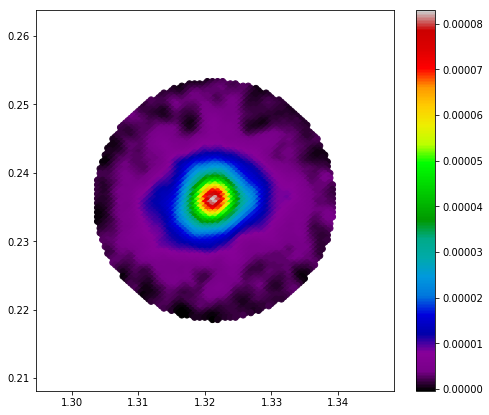

In [49]:
c1 = SkyCoord(phi_p*u.rad, (np.pi/2 - theta_p)*u.rad, frame='icrs')
c2 = SkyCoord(phi*u.rad, (np.pi/2 - theta)*u.rad, frame='icrs')
sep = c1.separation(c2)
ids2 = (sep.degree<1)

mplot.figure(figsize=(8,7))
mplot.scatter(phi[ids2]*u.rad, (np.pi/2 - theta[ids2])*u.rad, c=sz_map[ids2], cmap='nipy_spectral')
mplot.colorbar()
mplot.show()

ids = (sep.degree<3)


In [36]:
bin_edge = np.logspace(np.log10(0.5), np.log10(180.0), num=61)
bin_min = bin_edge[:-1]
bin_max = bin_edge[1:]


new_ra = phi[ids]*u.rad
new_dec = (np.pi/2 - theta[ids])*u.rad
new_sz = sz_map[ids]
Y = []
Yerr = []
for i in range(60):
    c2 = SkyCoord(new_ra, new_dec, frame='icrs')
    sep = c1.separation(c2)
    mask = (np.array(sep.degree) >= bin_min[i]/60)*(np.array(sep.degree) < bin_max[i]/60)
    Y.append(np.mean(new_sz[mask]))
    Yerr.append(np.std(new_sz[mask]))
    print(len(new_sz[mask]))
        

/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
2
3
2
1
2
4
7
4
4
10
9
10
17
15
21
28
26
37
49
58
67
81
96
125
142
187
219
268
320
395
473
583
719
854
1046
1299
1553
1880
2301
2818
3399
4149
5055
6156


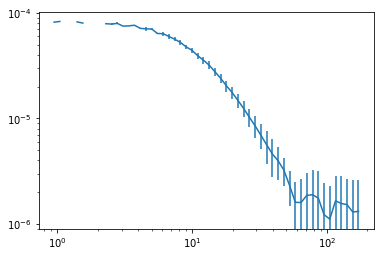

In [37]:
mplot.errorbar((bin_min+bin_max)/2, Y, yerr=Yerr)
mplot.xscale('log')
mplot.yscale('log')